In [65]:
#importing all the necessary packages 
import requests  
import csv
import pandas as pd
import matplotlib.pyplot as mp
import seaborn as sb
import numpy as np

In [66]:
#saving jabref api in URl variable 
url='https://api.github.com/search/issues?q=is:pr+repo:jabref/jabref'

In [67]:
#http request to the URL and collecting it reponse 
response = requests.get(url)

In [68]:
#the reponse data is converted json 
data=response.json()

In [69]:
#collecting title , pull request ,body , state, date of creation , closing date , user details of the repositories in respo.csv file 
with open('repos.csv', 'w', newline='',encoding="utf-8") as file: #creating repos.csv file in write mode
    writer = csv.writer(file)
    writer.writerow(["title","number","body","state","date of creation","closing date","user"]) #creating column names 
    j=0
    for i in data['items']: #collecting all responses from items key
        title,number,body,state,created_at,closed_at,user=(i['title'],i['number'],i['body'],i['state'],i['created_at'],i['closed_at'],i['user']['login'])
        writer.writerow([title,number,body,state,created_at,closed_at,user])
        j=j+1

In [70]:
#reading repos.cvs into pandas data frame 
repos_df=pd.read_csv('repos.csv')

In [71]:
#collecting number columns values into list 
num_list=repos_df['number'].tolist()

In [72]:
#collecting owner , repo , number of commits , additions , deletions , changed files details in repos/owner-repo.csv files 
for i in num_list:
    url='https://api.github.com/repos/JabRef/jabref/pulls/'+str(i) #api call for each user based on number of Github pulls 
    response = requests.get(url) #http request to the URL and collecting it reponse
    data=response.json() #the reponse data is converted json
    owner=data['user']['login']
    repo=data['head']['repo']['name']
    commits=data['commits']
    additions=data['additions']
    deletions=data['deletions']
    changed_files=data['changed_files']
    file_name='repos'+owner+'-'+repo+'.csv'
    csvfile = open(file_name, 'w')
    rowWriter = csv.writer(csvfile, delimiter=',', quoting=csv.QUOTE_NONE) 
    rowWriter.writerow (["number of commits","additions","deletions","changed_files"]) #creating columns
    rowWriter.writerow([commits,additions,deletions,changed_files]) #writing data into csv file 
    csvfile.close()

In [73]:
#collecting number of follower , followings , repos of a user into users.cvs file 
l=list(set(repos_df['user'])) 
with open('users.csv', 'w', newline='',encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["user","number of repositories","number of followers","number of following"])
    for i in l:
        repo_url='https://api.github.com/users/'+str(i)+'/repos'
        followers_url='https://api.github.com/users/'+str(i)+'/followers'
        following_url='https://api.github.com/users/'+str(i)+'/following'
        response1= requests.get(repo_url) #http request to the URL and collecting it reponse
        response2 = requests.get(followers_url)#http request to the URL and collecting it reponse
        response3 = requests.get(following_url)#http request to the URL and collecting it reponse
        data1=response1.json()#the reponse data is converted json
        data2=response2.json()#the reponse data is converted json
        data3=response3.json()#the reponse data is converted json
        num_repos=len(data1)
        num_followers=len(data2)
        num_following=len(data3)
        writer.writerow([i,num_repos,num_followers,num_following]) #saving the data into cvs file 

In [75]:
#collecting owner , repo number of commits addition , deletions in all repos.cvs file 
with open('all_repos.csv', 'w', newline='',encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["user","repo_name","commits","additions","deletions","changed_files"])
    for i in num_list:
        url='https://api.github.com/repos/JabRef/jabref/pulls/'+str(i)
        response = requests.get(url)#http request to the URL and collecting it reponse
        data=response.json()#the reponse data is converted json
        owner=data['user']['login']
        repo=data['head']['repo']['name']
        commits=data['commits']
        additions=data['additions']
        deletions=data['deletions']
        changed_files=data['changed_files']
        writer.writerow([owner,repo,commits,additions,deletions,changed_files]) #saving data in cvs file 

KeyError: 'user'

In [76]:
users_df=pd.read_csv('users.csv') #collecting cvs data into pandas data file
all_repos=pd.read_csv('all_repos1.csv') #collecting cvs data into pandas data file

In [77]:
all_repos['state']=np.where(all_repos['user']==repos_df['user'],repos_df['state'],'') #collecting state details in all repos data frame 

<AxesSubplot:xlabel='state', ylabel='commits'>

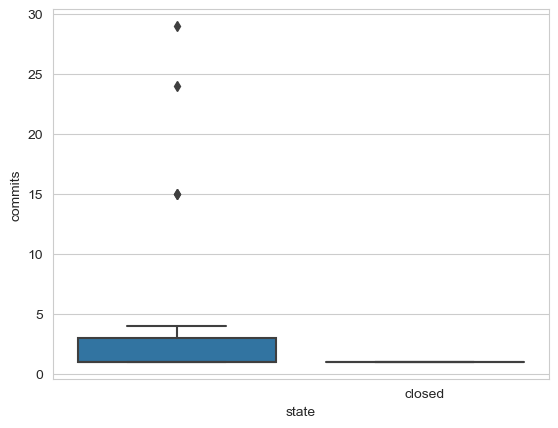

In [41]:
#box plot that comapares closed vs open pulled requests in terms of number of commits
sb.set_style("whitegrid")
  
    
    
    
    
    
    
    
    
    
    
sb.boxplot(x = 'state', y = 'commits', data = all_repos)

<AxesSubplot:xlabel='additions', ylabel='commits'>

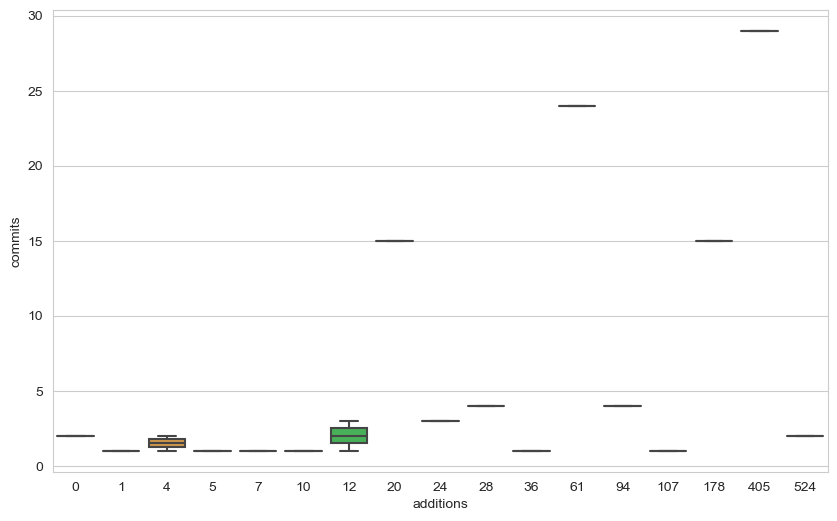

In [78]:
#box plot that comapares closed vs open pulled requests in terms of additions
sb.set_style("whitegrid")
fig, ax = mp.subplots(figsize=(10, 6))
sb.boxplot(x = 'additions', y = 'commits', data = all_repos,ax=ax)

<AxesSubplot:xlabel='deletions', ylabel='commits'>

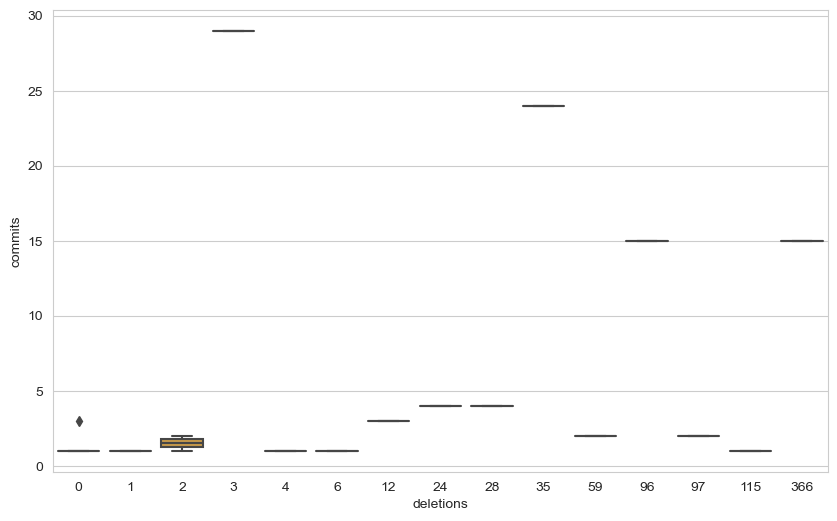

In [79]:
#box plot that comapares closed vs open pulled requests in terms of deletions
sb.set_style("whitegrid")
fig, ax = mp.subplots(figsize=(10, 6))
sb.boxplot(x = 'deletions', y = 'commits', data = all_repos,ax=ax)

<AxesSubplot:xlabel='user', ylabel='changed_files'>

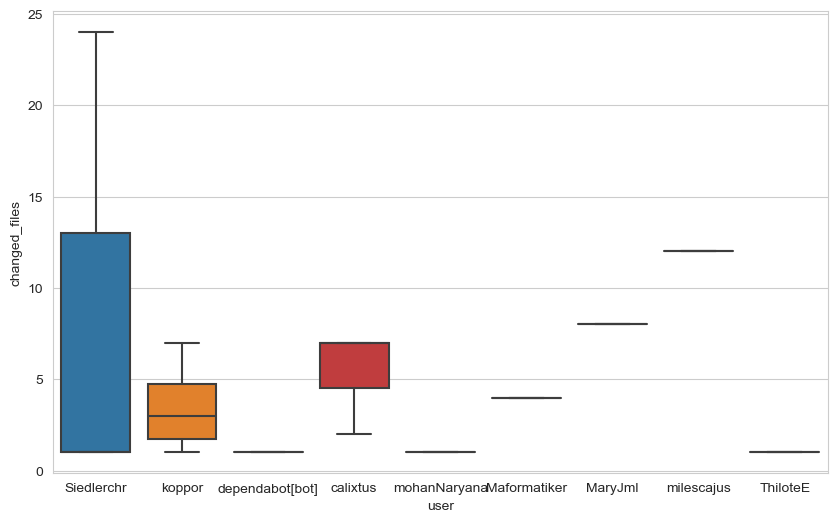

In [80]:
#box plot that comapares closed vs open pulled requests in terms of deletions
sb.set_style("whitegrid")
fig, ax = mp.subplots(figsize=(10, 6))
sb.boxplot(x = 'user', y = 'changed_files', data = all_repos,ax=ax)

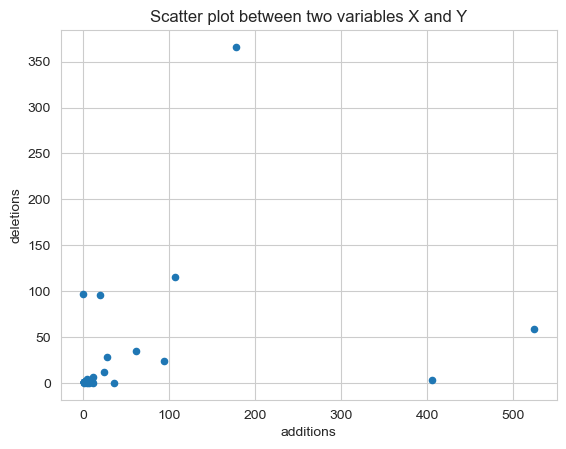

In [81]:
#a scatterplot that showws the relationship between additions and deletions
all_repos.plot.scatter(x='additions', y='deletions', title= "Scatter plot between two variables X and Y");

mp.show(block=True);

<AxesSubplot:xlabel='date of creation'>

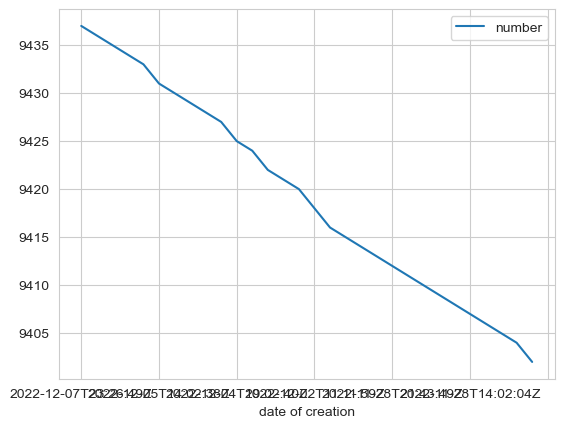

In [82]:
#line graph showing the total number of pull requests per day
repos_df.plot( 'date of creation' , 'number' )

<AxesSubplot:xlabel='number of repositories'>

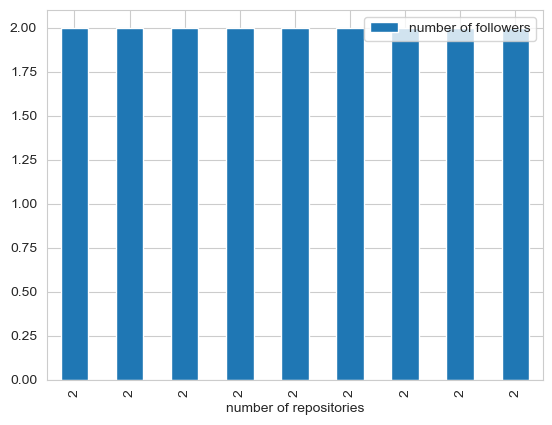

In [83]:
#bars comparing the number of users per repo
users_df.plot(x="number of repositories", y="number of followers", kind="bar")

                commits  additions  deletions  changed_files
commits        1.000000   0.476650   0.345681       0.859348
additions      0.476650   1.000000   0.293320       0.427598
deletions      0.345681   0.293320   1.000000       0.476925
changed_files  0.859348   0.427598   0.476925       1.000000


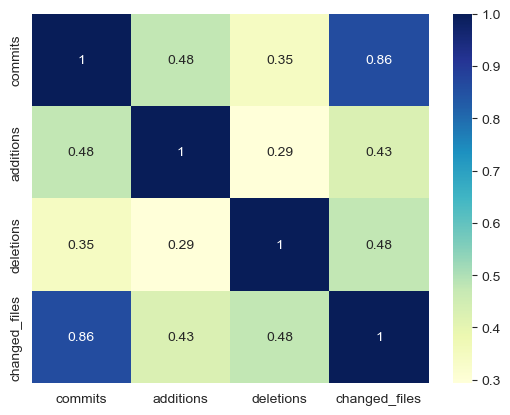

In [48]:
#corelation between all the numeric data in pull requests for a repo
print(all_repos.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(all_repos.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()

                        number of repositories  number of followers  \
number of repositories                     NaN                  NaN   
number of followers                        NaN                  NaN   
number of following                        NaN                  NaN   

                        number of following  
number of repositories                  NaN  
number of followers                     NaN  
number of following                     NaN  


C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
C:\Users\Vaishnavi\anaconda3\lib\site-packages\seaborn\matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


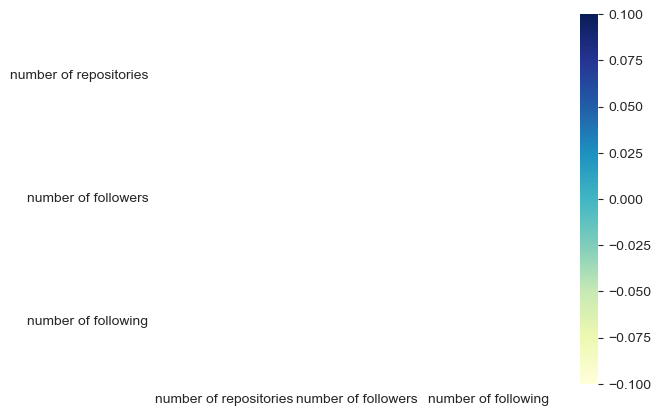

In [84]:
#corelation between all the numeric data in pull requests for a repo
print(users_df.corr())
  
# plotting correlation heatmap
dataplot = sb.heatmap(users_df.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
mp.show()